In [22]:
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/tp_ai/consupmtion/consumption.xlsx")
df.head()

,Unnamed: 0,datetime,Global_active_power
0,0,2006-12-16 17:00:00,152.024
1,1,2006-12-16 18:00:00,217.932
2,2,2006-12-16 19:00:00,204.014
3,3,2006-12-16 20:00:00,196.114
4,4,2006-12-16 21:00:00,183.388


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34589 entries, 0 to 34588
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           34589 non-null  int64         
 1   datetime             34589 non-null  datetime64[ns]
 2   Global_active_power  34589 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 810.8 KB


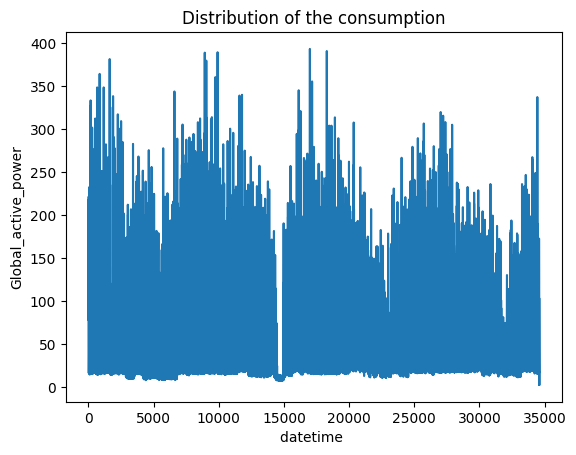

In [24]:
import matplotlib.pyplot as plt
plt.xlabel('datetime ')
plt.ylabel('Global_active_power')
plt.title('Distribution of the consumption')
plt.plot(df['Global_active_power'])
plt.show()

In [25]:
# plt.figure(figsize=(10,5))
# # plt.bar(df['datetime'],df['Global_active_power'],color='lightblue', width=0.4)
# plt.xticks(rotation=45, ha='right')
# plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
# Convert datetime to numerical columns

In [28]:
# Drop the original datetime column
df = df.drop(columns=['datetime'])

In [29]:
# Normalize Global_active_power
scaler = MinMaxScaler(feature_range=(0, 1))
df['Global_active_power'] = scaler.fit_transform(df['Global_active_power'].values.reshape(-1,1))

In [30]:
X = df.drop(columns=['Global_active_power']).values
y = df['Global_active_power'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# import numpy as np
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [33]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [34]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

In [35]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

In [37]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score)

Test score: 0.019020292907953262


In [39]:
y_pred=model.predict(X_test)

217/217 [==============================] - 1s 4ms/step


In [40]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
mae = np.round(np.mean(np.abs(y_test-y_pred))*100,2)
mape = np.round(np.mean(np.abs(y_test-y_pred)/y_test)*100,2)

In [41]:
print("RMSE=",rmse)
print("MAE=",mae)
print("MAPE=",mape)

RMSE= 0.14
MAE= 11.18
MAPE= 150.06
